In [2]:
import numpy as np
import pandas as pd
import scipy as su

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 표준화

In [46]:
data = pd.read_csv('data/orginal_데이터_합본.csv', encoding='cp949', index_col=0)
data.head()

,역사명,동별,호선,환승,역위도,역경도,일평균승차,일평균하차,일평균승하차,순위,하행 대기시간,상행 대기시간,상가 갯수,사용중인 상가,비어있는 상가,구군별,소계,1인가구수,업장 수
0,다대포해수욕장,다대1동,1.0,NaN,35.048670,128.964100,4264.0,3497.0,7761.0,69.0,20.0,0.0,2.0,2.0,0.0,사하구,16941.0,6298.0,345.0
1,다대포항,다대1동,1.0,NaN,35.057820,128.971300,2900.0,3321.0,6221.0,80.0,20.0,20.0,1.0,1.0,0.0,사하구,16941.0,6298.0,345.0
2,낫개,다대2동,1.0,NaN,35.065265,128.979873,4104.0,4223.0,8327.0,64.0,20.0,20.0,1.0,1.0,0.0,사하구,12110.0,4651.0,246.0
3,신장림,장림2동,1.0,NaN,35.074433,128.977041,2777.0,2583.0,5360.0,91.0,20.0,20.0,1.0,1.0,0.0,사하구,11905.0,4165.0,302.0
4,장림,장림2동,1.0,NaN,35.081090,128.977500,2854.0,2636.0,5490.0,89.0,20.0,20.0,1.0,1.0,0.0,사하구,11905.0,4165.0,302.0


In [47]:
data = data.fillna(0)
data.isnull().sum()

역사명        0
동별         0
호선         0
환승         0
역위도        0
역경도        0
일평균승차      0
일평균하차      0
일평균승하차     0
순위         0
하행 대기시간    0
상행 대기시간    0
상가 갯수      0
사용중인 상가    0
비어있는 상가    0
구군별        0
소계         0
1인가구수      0
업장 수       0
dtype: int64

- 특성

In [48]:
data_all = data[['일평균승하차','상가 갯수','사용중인 상가','비어있는 상가','소계','1인가구수','업장 수']].to_numpy()

In [49]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(data_all)

StandardScaler()

In [50]:
data_scaled = ss.transform(data_all)

In [52]:
data_scaled[:10]

array([[-0.52517158, -0.07897767, -0.01012525, -0.29417336,  2.07685608,
         1.41384763,  0.01523727],
       [-0.67206267, -0.28844018, -0.25718147, -0.29417336,  2.07685608,
         1.41384763,  0.01523727],
       [-0.47118434, -0.28844018, -0.25718147, -0.29417336,  0.93407587,
         0.55314341, -0.262343  ],
       [-0.75418813, -0.28844018, -0.25718147, -0.29417336,  0.88558282,
         0.29916512, -0.1053279 ],
       [-0.74178824, -0.28844018, -0.25718147, -0.29417336,  0.88558282,
         0.29916512, -0.1053279 ],
       [-0.63801064, -0.28844018, -0.25718147, -0.29417336,  0.01081544,
         0.06295485, -0.32963519],
       [-0.18627287,  1.3872599 ,  0.9780996 ,  2.33186201, -0.13348096,
        -0.61536578, -0.45580803],
       [ 1.50831607,  1.59672241,  1.96632445, -0.29417336,  0.57002314,
         0.67595184,  0.09654866],
       [-0.22299564,  0.33994735, -0.01012525,  1.45651689,  0.7632857 ,
         0.09640055,  0.20309462],
       [-0.59384793, -0.4979

In [53]:
data_pd = pd.DataFrame(data_scaled, columns=['일평균승하차','상가 갯수','사용중인 상가','비어있는 상가','소계','1인가구수','업장 수'])
data_pd

,일평균승하차,상가 갯수,사용중인 상가,비어있는 상가,소계,1인가구수,업장 수
0,-0.525172,-0.078978,-0.010125,-0.294173,2.076856,1.413848,0.015237
1,-0.672063,-0.288440,-0.257181,-0.294173,2.076856,1.413848,0.015237
2,-0.471184,-0.288440,-0.257181,-0.294173,0.934076,0.553143,-0.262343
3,-0.754188,-0.288440,-0.257181,-0.294173,0.885583,0.299165,-0.105328
4,-0.741788,-0.288440,-0.257181,-0.294173,0.885583,0.299165,-0.105328
...,...,...,...,...,...,...,...
117,-1.232443,-0.288440,-0.504238,0.581172,-0.068193,0.437651,-0.506277
118,-0.807985,-0.288440,-0.257181,-0.294173,-0.068193,0.437651,-0.506277
119,-0.853387,-0.497903,-0.504238,-0.294173,0.888185,1.120153,-0.338047
120,-1.168535,-0.497903,-0.504238,-0.294173,-1.930563,-1.877418,-0.952088


In [54]:
data_corr = data_pd.corr()

In [55]:
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 히트맵

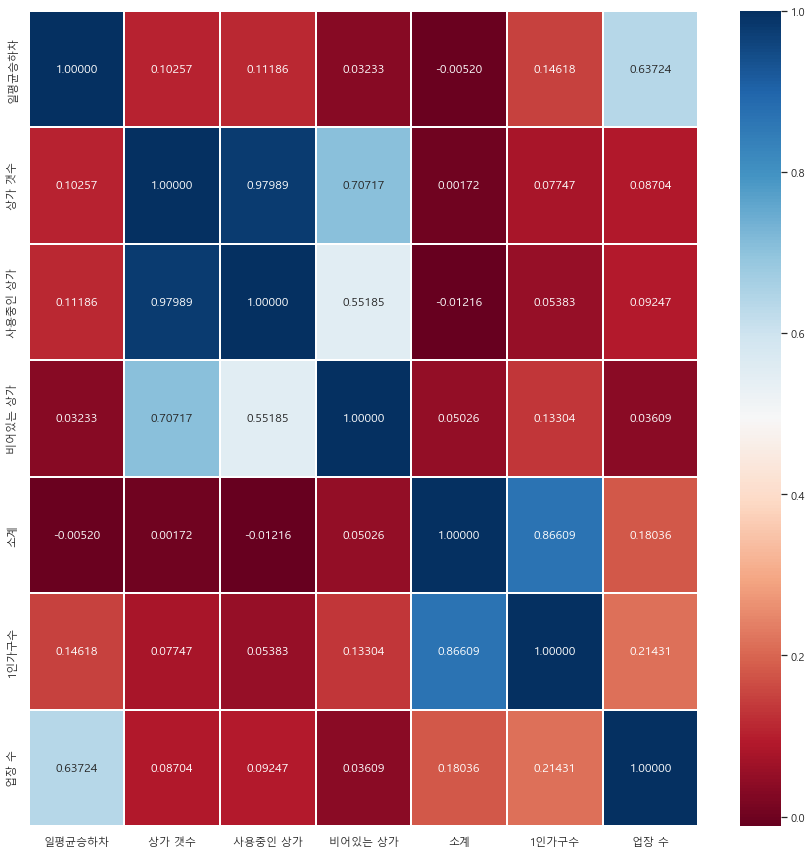

In [56]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(data_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()